# Understanding Inequality

Inequality is one of the most important social issues today. However, I find many people are confused about the conditions necessary for inequality. I hope to add clarity to this issue with a little demonstration.

## Income Inequality

In many countries, a small number of people have a disproportionately high income/wealth. This seems unfair and unreasonable.

To understand this inequality, let's start with a very simple model of success. We assume that people have 3 different traits: skill, luck, and work ethic. Then we assume that their overall success in life will be the product of these three factors.

$$\text{success} = \text{luck} \times \text{skill} \times \text{work ethic}$$

And we assume that these traits are independent and normally distributed. A normal distribution is the classic bell curve. Most people have average skill but a few are very skilled and a few are extremely unskilled. Most people have average luck, but some are really lucky and some are really unlucky. And luck doesn't depend on skill; they are independent. The distribution of each trait looks like the following graph.

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

np.random.seed(136239)

In [149]:
trials = 1000000

In [150]:
# mean of 100, standard deviation of 30
luck = 100 + 30 * np.random.randn(trials)
luck = np.maximum(0, luck)

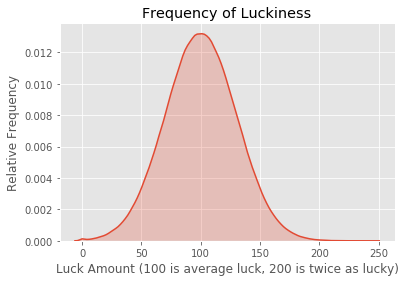

In [151]:
sns.kdeplot(luck, shade=True)
plt.title('Frequency of Luckiness')
plt.xlabel('Luck Amount (100 is average luck, 200 is twice as lucky)')
plt.ylabel('Relative Frequency')
plt.show()

## Simulation

Now we generate a whole bunch of people with random traits from these normal distributions.

In [152]:
skill = 100 + 30 * np.random.randn(trials)
skill = np.maximum(0, skill)

work_ethic = 100 + 30 * np.random.randn(trials)
work_ethic = np.maximum(0, work_ethic)

Let's take a look at one of our randomly generated individuals:

In [105]:
# Individual Number 42
print(f'Individual 42 has a skill value of {skill[42]}, a work ethic of {work_ethic[42]} and a luck value of {luck[42]}.')

Individual 42 has a skill value of 116.10395239593103, a work ethic of 109.51355363244807 and a luck value of 99.57659513636759.


As 100 is the average for each trait, this person is much more skilled than average, has a slightly higher work ethic, and has average luck.

## Success

Below I calculated the success of each individual. Before you scroll down, try to think through your expectation of the success distribution. I generated a million people with three independent random traits that multiplied to equal their success. The distribution of each trait is just a bell curve. Do you imagine individual success also matches the bell curve?

In [106]:
success = skill * luck * work_ethic

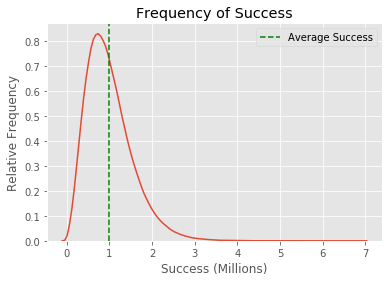

In [107]:
sns.kdeplot(success/1000000)
plt.title('Frequency of Success')
plt.ylabel('Relative Frequency')
plt.xlabel('Success (Millions)')
plt.axvline(x=1, color='g', linestyle='--', label='Average Success')
plt.legend(loc='upper right')
plt.show()

## Wild Inequality Appears

Was this what you expected the graph to look like?

There's a large peak near the green line. That is 1 million or the result of 100 skill times 100 luck times 100 work ethic. That is how a completely average person would score. However, there already appears to be inequality. There's at least one person that has a success value of almost 7 million, way more than average. This distribution has a weird skew that the individual trait distributions didn't have.

This is more pronounced when we rank individuals.

In [112]:
sorted_success = np.sort(success)

In [113]:
x = [i for i in range(trials)]

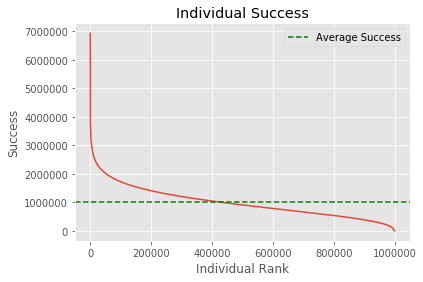

In [114]:
plt.plot(x, sorted_success[::-1])
plt.xlabel('Individual Rank')
plt.ylabel('Success')
plt.title('Individual Success')
plt.axhline(y=1000000, color='g', linestyle='--', label='Average Success')
plt.legend(loc='upper right')
plt.show()

## The 1%

There is just a tiny sliver of people that are way more successful while everyone else hovers around average. Let's compare total success between these hyper-successful individuals and the rest.

In [115]:
top_person = sorted_success[-1]
bottom_sum = 0
counter = 0
while bottom_sum < top_person:
    bottom_sum += sorted_success[counter]
    counter += 1
print(f'The top person has as much success as the bottom {counter} people.')

The top person has as much success as the bottom 1862 people.


In [116]:
one_percent = int(trials * 0.01)
top_one_percent = sorted_success[-one_percent:].sum()
bottom_sum = 0
counter = 0
while bottom_sum < top_one_percent:
    bottom_sum += sorted_success[counter]
    counter += 1
bottom_percent = counter / trials * 100 
print(f'The top 1% has as much success as the bottom {bottom_percent}% of people.')

The top 1% has as much success as the bottom 10.932400000000001% of people.


## Results

In our simulation, success is not distributed evenly. The most successful individual has almost as much success as the bottom 2000 people. Our simple model already results in inequality. All we required was three independent factors that lead to success. Importantly, this doesn't have to be skill, luck, and work ethic. This could be a model for understanding the success of almost anything. 

Let's take drug detection sniffer dogs. If you model a sniffer dog's success at finding contraband as a product of its innate sensitivity to smells and its responsiveness to training, then you will end up with a success curve that looks like the one above.

Or take pro golf players. If you assume their success at golf is some product of their ability to handle stress, general hand-eye coordination, and access to early coaching/mentoring you also get a curve that looks like the one above.

## More Factors

We can see how the graph changes as the measure for success becomes more complicated and depends on more factors.

Let's try a model where success is determined by 10 different factors instead of 3.

In [153]:
# now we mess with the number of factors
factors = 10
sd = 30
mean = 100
success_more_factors = np.ones(trials)
for i in range(factors):
    factor = mean + sd * np.random.randn(trials)
    factor = np.maximum(0, factor)
    success_more_factors = success_more_factors * factor

In [154]:
success_more_factors = np.sort(success_more_factors)

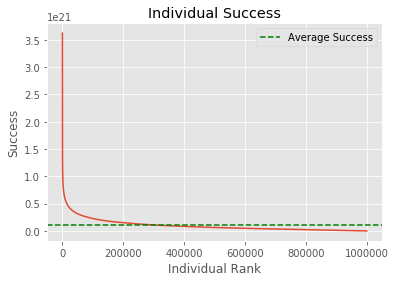

In [155]:
plt.plot(x, success_more_factors[::-1])
plt.xlabel('Individual Rank')
plt.ylabel('Success')
plt.title('Individual Success')
plt.axhline(y=100**10, color='g', linestyle='--', label='Average Success')
plt.legend(loc='upper right')
plt.show()

This graph is so skewed it looks like the average success line must be a mistake. But it's placed correctly. The average success is just tiny compared to the hyper-success of some individuals.

In [157]:
top_person = success_more_factors[-1]
bottom_sum = 0
counter = 0
while bottom_sum < top_person:
    bottom_sum += success_more_factors[counter]
    counter += 1
print(f'Top person has as much success as the bottom {counter} people.')

Top person has as much success as the bottom 8539 people.


In [158]:
one_percent = int(trials * 0.01)
top_one_percent = success_more_factors[-one_percent:].sum()
bottom_sum = 0
counter = 0
while bottom_sum < top_one_percent:
    bottom_sum += success_more_factors[counter]
    counter += 1
bottom_percent = counter / trials * 100 
print(f'Top 1% has as much success as the bottom {bottom_percent}% of people.')

Top 1% has as much success as the bottom 35.2875% of people.


We see that the distribution gets more and more skewed the more factors you add. This means that in complicated domains, where success is a product of many different skills/traits/attributes we expect success to be even more unevenly distributed.

## Real Life

Multiplying independent random factors results in something called a log-normal distribution. This is the theoretical name for our success distribution. With a quick check of [Wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution), we can see there are many real-life cases where the log-normal distribution applies, including most people's income.

## Social Factors

Many social factors have each taken the blame for income inequality. I have heard people tout oppression, the patriarchy, capitalism, greed, corruption, corporate lobbyists, class warfare, business people, racism, discrimination, the market, etc. as the main cause of income inequality in society today. Of course, some of these things can influence the overall level of inequality in society.

But none of those things are **necessary** for massive inequality. Even without any of these social factors, it is possible to get massive inequality in a domain as long as success in that domain is the product of independent random variables. I didn't have to include a factor for "undue corporate influence in the law," in my model to get disparities between individuals.

And people all too often make the reverse mistake. Because inequality exists, they assume it must be because of explicit actions by a corrupt few. They assume there must be some social institution of oppression, corruption, greed, or discrimination that is causing inequality. But I've shown that inequality within a domain could just be evidence that the domain falls under the model we have explored.

# Gender Inequality

Statistics has something to say about gender inequality as well.

Let's do another simulation. In this simulation, we are going to take a look at a trait that differs between the genders: height.

The heights of men and women are approximately normally distributed. But the distribution for men is shifted compared to women; men are taller than women on average. Let's plot some simulated curves with approximately correct numbers. I assume that the average height for men is 5'10" and the average height for women is 5'5", with standard deviations of 4 inches.

In [159]:
np.random.seed(356773)
trials = 1000000
men = 70 + 4 * np.random.randn(trials)
men = np.maximum(0, men)
women = 65 + 4 * np.random.randn(trials)
women = np.maximum(0, women)

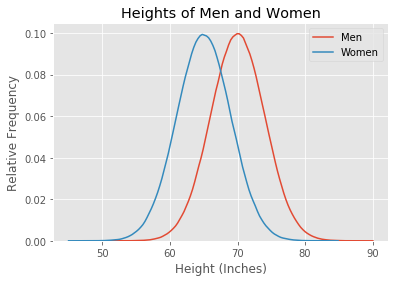

In [160]:
sns.kdeplot(men, label='Men')
sns.kdeplot(women, label='Women')
plt.title('Heights of Men and Women')
plt.xlabel('Height (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

Getting the data exactly right doesn't matter for this demonstration.

Now we can ask two crucially different probability questions about these distributions. It's easy to get confused because the difference between the questions is subtle.

### Question 1

If you pick a random man and woman, what is the probability that the man will be taller?

In [161]:
total = 0
taller = 0
for i in range(trials):
    if men[i] > women[i]:
        taller += 1
    total += 1
percentage = taller / total * 100
print(f'The probability a random man is taller than a random woman is {percentage}%.')

The probability a random man is taller than a random woman is 81.1499%.


This code just compares all the randomly generated men and women. The answer seems right based on my general intuition about human heights.

### Question 2

What percentage of the tallest people are men?

Intuitively you might think this is the same as the first question. There's an 80% chance a random man is taller than a random woman, so shouldn't we expect that 80% of the tallest people are men? **Absolutely not**.

Let's figure out what the true answer is:

In [162]:
men_sorted = np.sort(men)[::-1]
women_sorted = np.sort(women)[::-1]

number_of_men = 0
number_of_women = 0
same = 0
number = 100000

for i in range(number):
    if men_sorted[number_of_men] > women_sorted[number_of_women]:
        number_of_men += 1
    elif men_sorted[number_of_men] < women_sorted[number_of_women]:
        number_of_women += 1
    else:
        same += 1
        number_of_women += 1
        number_of_men += 1

number_of_women -= same
number_of_men -= same

print(f'The tallest {number/trials * 100}% of people are {number_of_men / number * 100}% men.')

The tallest 10.0% of people are 94.848% men.


Here we get a completely different answer. A random man is taller than a random woman 80% of the time, but 95% of the tallest people are men. What gives?

And the opposite happens when we consider the shortest people.

In [163]:
men_sorted = np.sort(men)
women_sorted = np.sort(women)

number_of_men = 0
number_of_women = 0
same = 0
number = 100000

for i in range(number):
    if men_sorted[number_of_men] < women_sorted[number_of_women]:
        number_of_men += 1
    elif men_sorted[number_of_men] > women_sorted[number_of_women]:
        number_of_women += 1
    else:
        same += 1
        number_of_women += 1
        number_of_men += 1

number_of_women -= same
number_of_men -= same

print(f'The shortest {number/trials * 100}% of people are {number_of_men / number * 100}% men.')

The shortest 10.0% of people are 5.127000000000001% men.


## Extreme Ends of the Bell Curve

This strange result occurs when you zoom in on the end of a bell curve.

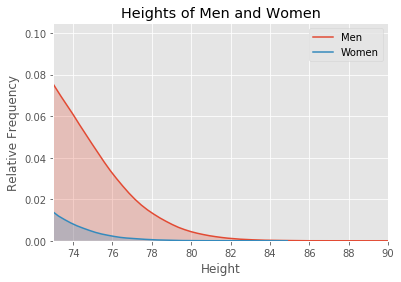

In [130]:
sns.kdeplot(men, label='Men', shade=True)
sns.kdeplot(women, label='Women', shade=True)
plt.title('Heights of Men and Women')
plt.xlabel('Height')
plt.ylabel('Relative Frequency')
plt.xlim(73, 90)
plt.show()

We've zoomed in on the tallest people. The total number of men between 73 inches (6'1") to 90 inches (7'6") is the area under the red curve. This includes the red shaded area and the blue shaded area. The total number of women between these heights is the area under the blue curve. The area under the red curve is much larger than the area under the blue curve. 

Thus, the shape of the bell curve results in way more men in this section of the graph with the tallest people. And this proportion just keeps getting bigger as you slice off smaller sections up to the max height.

In [137]:
men_sorted = np.sort(men)[::-1]
women_sorted = np.sort(women)[::-1]

number_of_men = 0
number_of_women = 0
same = 0
number = 10000

for i in range(number):
    if men_sorted[number_of_men] > women_sorted[number_of_women]:
        number_of_men += 1
    elif men_sorted[number_of_men] < women_sorted[number_of_women]:
        number_of_women += 1
    else:
        same += 1
        number_of_women += 1
        number_of_men += 1

number_of_women -= same
number_of_men -= same

print(f'The tallest {number/trials * 100}% of people are {number_of_men / number * 100}% men.')

The tallest 1.0% of people are 98.31% men.


As you zoom in on taller and taller people, the proportion of men goes up. The top 10% of people by height is 95% men. The top 1% is 98% men. And the top few hundred people are **all** men.

## Insights

This example was specific to height. But the exact trait doesn't matter and thus the results can be generalized. The answers to Question 1 and Question 2 are seldom the same for any two normal distributions with different means. Small differences in groups are **magnified** at the ends of the normal distribution. 

Our height example showed that because on average men are taller, basically all of the tallest people are men. You get the same sort of magnification even if the differences between the genders are small. For example, here's a graph with a made-up trait where men and women are much closer than with height. It could be a health marker like cholesterol levels or perhaps a Big 5 personality trait, it doesn't matter. I'm going to call it Trait A.

In [143]:
np.random.seed(2348929)
trials = 1000000
men = 105 + 15 * np.random.randn(trials)
men = np.maximum(0, men)
women = 100 + 15 * np.random.randn(trials)
women = np.maximum(0, women)

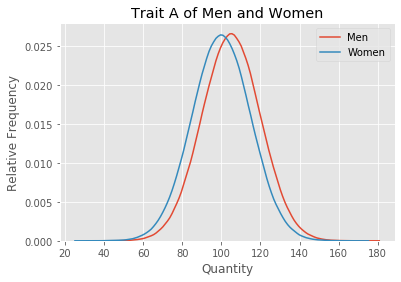

In [144]:
sns.kdeplot(men, label='Men')
sns.kdeplot(women, label='Women')
plt.title('Trait A of Men and Women')
plt.xlabel('Quantity')
plt.ylabel('Relative Frequency')
plt.show()

It's clear that on this particular made up trait, the variation within a gender is much larger than the variation between genders. Overall men and women are quite similar on this trait.

In [145]:
total = 0
taller = 0
for i in range(trials):
    if men[i] > women[i]:
        taller += 1
    total += 1
percentage = taller / total * 100
print(f'The probability a random man has a higher Trait A than a random woman is {percentage}%.')

The probability a random man has a higher Trait A than a random woman is 59.3499%.


Given a random man and woman, it is pretty close to a coin flip as to who has a higher value of trait A. Men and women are much closer on Trait A than they were on height.

But now let's test the second question, looking at the people with the highest value of Trait A.

In [147]:
men_sorted = np.sort(men)[::-1]
women_sorted = np.sort(women)[::-1]

number_of_men = 0
number_of_women = 0
same = 0
number = 1000

for i in range(number):
    if men_sorted[number_of_men] > women_sorted[number_of_women]:
        number_of_men += 1
    elif men_sorted[number_of_men] < women_sorted[number_of_women]:
        number_of_women += 1
    else:
        same += 1
        number_of_women += 1
        number_of_men += 1

number_of_women -= same
number_of_men -= same

print(f'The {number/trials * 100}% of people with the highest value of Trait A are {number_of_men / number * 100}% men.')

The 0.1% of people with the highest value of Trait A are 78.9% men.


Again we see that a small difference gets **magnified at the extreme**.

## Application

This statistical fact can explain many gender/group inequalities. Put into a simple sentence, small differences in averages can have a massive effect on the extremes.

One troubling inequality is the percentage of inmates who are men. Looking at the [Federal Bureau of Prisions](https://www.bop.gov/about/statistics/statistics_inmate_gender.jsp) website, they state that about 93% of prison inmates are men. This could result if men on average are slightly more prone to crime. Then if you take a look at only the people **most** prone to crime, enough to land in jail, almost all of them are men. Just like how almost all of the tallest people are men.

And it's important to state how making the reverse implication is wrong. The fact that 93% of inmates are men does not imply that the average man is way more likely to commit a crime. It doesn't imply that if you were to take a random man and woman, it's a 93% chance that he is more prone to crime.

Similarly to the income inequality issue, this statistical argument shows that a small difference in averages is **enough** to cause a huge discrepancy in outcomes of groups. But here people make two types of mistakes. (1) They can see massive inequality as proof that the groups are very very different from each other. Or (2) they attribute large inequalities between groups as evidence of massive social biases or overt oppression. Both these mistakes don't take into account the fact that small differences in the average between groups are magnified at the extremes.

## Controversial Issues

A slight average difference between the genders is enough to explain gender or group disparity in a particular occupation because a competitive occupation is the equivalent of slicing a normal distribution at the extreme. Factors such as gender bias and discrimination are not required. 

This argument can be applied to the proportion of male engineers. Depending on the survey it appears women make up around 25% of engineering graduates. Here's one [report](https://www150.statcan.gc.ca/n1/pub/75-006-x/2013001/article/11874-eng.htm) that put it at 23%. That means the field is 77% men. Assume there is some difference between men and women that causes men on average to want to be engineers slightly more. Then the subset of people who become engineers is likely to be the ones who wanted it the most, which will be heavily biased male. And it doesn't matter what the trait is. As long as the trait is slightly different on average it can result in gender disparity.

I can think of several traits that might differ slightly between men and women that cause different career preferences. General interest in cars/engines/machines is the first that pops into my head. Psychologist Richard Lippa found that women tend to be more people-oriented and men more thing-oriented in his book Gender, Nature, and Nurture. 

However, I'm sure that there are many other differences at play. And obviously, one trait doesn't decide your occupation. All that is required is that on average there is some difference between men and women and that this difference is approximately bell-shaped. Similar results can be achieved with a wide variety of statistical distributions.

Of course, gender discrimination does exist and can influence the proportions of genders in different occupations. It's just not necessary to explain the inequality we currently have.

The further into the tail of the distribution you go, the more inequality you expect because of the shape of the normal distribution. Thus the statistics suggest that the most competitive and most extreme jobs will tend to have the most inequality between the genders because these occupations correspond to zooming in on smaller and smaller subsets at the ends of the trait distributions.

This is why I would expect an intensely competitive job like a Fortune 500 CEO to be heavily made up of one group of people. Fortune 500 CEOs are likely to be the most competitive and career-oriented people in the world. Any difference in averages between genders or races or any group of people in their competitiveness and career orientedness will cause a large inequality in the proportion of CEOs. Thus, the fact that only 6% are women isn't surprising.

## Biggest Misconceptions

I want to reiterate this. I see two huge misconceptions when it comes to inequality between groups. We will use the Fortune 500 CEO statistic.

Some people think: there is a large inequality between men and women in top CEO positions. Therefore, women are **intrinsically** non-competitive or must be **vastly** different to result in the disparity. This is a false, vile, and damaging belief. Men and women are much more similar than they are different. It's just that small differences on average have a large impact when it comes to specific outcomes at the very extremes of society.

The second group thinks: there is a large inequality between men and women in top CEO positions **and** men and women are very similar. **Thus**, the large disparity must be due to an outside undue discriminatory force preventing the natural 50-50 split. This view makes the opposite error and assumes that small differences have no impact and that the natural state of the world is perfect equality of outcome.